In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## pre-processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import io
from io import StringIO
from google.colab import files

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/icoprog/chatgpt-tweets-data-20230310-20230322-processed.csv')
df

ID                       Date    Username  \
0      1638329623946878976  2023-03-21 23:59:55+00:00  lqgds36373   
1      1638329621581275136  2023-03-21 23:59:55+00:00  yxwec12342   
2      1638329600471171074  2023-03-21 23:59:50+00:00  cwsea23772   
3      1638329587133194240  2023-03-21 23:59:46+00:00  jerje51666   
4      1638329567759802368  2023-03-21 23:59:42+00:00  wwxly15746   
...                    ...                        ...         ...   
98754  1636521833494351872  2023-03-17 00:16:24+00:00  mlxmo58921   
98755  1636521810144673793  2023-03-17 00:16:19+00:00  oshfg66182   
98756  1636521791744032771  2023-03-17 00:16:14+00:00  ecxto33891   
98757  1636521759968219144  2023-03-17 00:16:07+00:00  gukaa66248   
98758  1636521747540242432  2023-03-17 00:16:04+00:00  haffm49006   

                                                   Tweet  ReplyCount  \
0                      ChatGPT is another woke machine.            4   
1      of the Atlantic, or only near the Atla #推特账号 m...           0   
2       This thread is saved to your Notion database....           0   
3                             Prompt AI – ChatGPT #0018            1   
4      Just had some interesting conversations with G...           1   
...                                                  ...         ...   
98754   Sorry my phones on da blink n my dyslexic mes...           0   
98755   If someone were to tell a future version of C...           1   
98756  ChatGPT can talk to your AWS infrastructure fo...           0   
98757  ChatGPT is not yet a human, but some humans ha...           0   
98758   One hopes that it knows about non-binary logi...           0   

       RetweetCount  LikeCount  QuoteCount    OnlyDate  OnlyHour  OnlyMin  \
0                 4         32           0  2023-03-21        23       59   
1                 0          0           0  2023-03-21        23       59   
2                 0          0           0  2023-03-21        23       59   
3                 0          0           0  2023-03-21        23       59   
4                 0          0           0  2023-03-21        23       59   
...             ...        ...         ...         ...       ...      ...   
98754             0          1           0  2023-03-17         0       16   
98755             0          2           0  2023-03-17         0       16   
98756             0          0           0  2023-03-17         0       16   
98757             0          0           0  2023-03-17         0       16   
98758             0          0           0  2023-03-17         0       16   

                                         processed_tweet sentiment_label  \
0                       chatgpt is another woke machine.        negative   
1      of the atlantic, or only near the atla more to...         neutral   
2      this thread is saved to your notion database. ...         neutral   
3                                    prompt ai – chatgpt         neutral   
4      just had some interesting conversations with g...        positive   
...                                                  ...             ...   
98754  sorry my phones on da blink n my dyslexic mess...        negative   
98755  if someone were to tell a future version of ch...         neutral   
98756  chatgpt can talk to your aws infrastructure fo...         neutral   
98757  chatgpt is not yet a human, but some humans ha...         neutral   
98758  one hopes that it knows about nonbinary logic....         neutral   

       sentiment_score  
0               0.8628  
1               0.8373  
2               0.8854  
3               0.8958  
4               0.9558  
...                ...  
98754           0.6278  
98755           0.9114  
98756           0.8676  
98757           0.8428  
98758           0.4792  

[98759 rows x 14 columns]

In [ ]:
df = df.drop_duplicates()
df = df.drop(["ReplyCount", "RetweetCount", "LikeCount", "QuoteCount"], axis=1)
df

ID                       Date    Username  \
56797  1637373432525365250  2023-03-19 08:40:21+00:00  hknkb56489   
96934  1636557617702277122  2023-03-17 02:38:36+00:00  jkclk74739   
96578  1636564539717087237  2023-03-17 03:06:06+00:00  flgxe23341   
56789  1637373590822608897  2023-03-19 08:40:59+00:00  qtopk80652   
54062  1637444261745442819  2023-03-19 13:21:48+00:00  bxzji54971   
...                    ...                        ...         ...   
97162  1636553076319432705  2023-03-17 02:20:33+00:00  oemar25954   
29489  1637895759260418048  2023-03-20 19:15:54+00:00  epizu78221   
27876  1637915529661800449  2023-03-20 20:34:27+00:00  jgado59785   
30044  1637889678975049734  2023-03-20 18:51:44+00:00  tvnjz59833   
15137  1638161063853056001  2023-03-21 12:50:07+00:00  jmwoa91726   

                                                   Tweet    OnlyDate  \
56797       Chatgpt is the only expert you ever need lol  2023-03-19   
96934  Everyone's talk to or about ChatGPT and the la...  2023-03-17   
96578  gone are the days where beign a builder was ha...  2023-03-17   
56789  #NigerianElections2023 #ChatGPT #chatgpt4 \n\n...  2023-03-19   
54062   please open restaurant 👀\n\nThis has been by ...  2023-03-19   
...                                                  ...         ...   
97162  Still Dismissing TikTok as Something for the k...  2023-03-17   
29489    WANTED: \n\nSINLESS CODER to TAKE OVER ChatG...  2023-03-20   
27876  #ChatGPT has identified the fix to the problem...  2023-03-20   
30044  is already worse. If we compare it with Micros...  2023-03-20   
15137  ChatGPT can never make chat - bhel, sev puri a...  2023-03-21   

       OnlyHour  OnlyMin                                    processed_tweet  \
56797         8       40       chatgpt is the only expert you ever need lol   
96934         2       38  everyones talk to or about chatgpt and the law...   
96578         3        6  gone are the days where beign a builder was ha...   
56789         8       40  have you seen the lead lightning system? disco...   
54062        13       21  please open restaurant this has been by far th...   
...         ...      ...                                                ...   
97162         2       20  still dismissing tiktok as something for the k...   
29489        19       15  wanted: sinless coder to take over chatgpt! i ...   
27876        20       34  has identified the fix to the problem reported...   
30044        18       51  is already worse. if we compare it with micros...   
15137        12       50  chatgpt can never make chat  bhel, sev puri an...   

      sentiment_label  sentiment_score  sentiment  \
56797        positive           0.5175          1   
96934        positive           0.6172          1   
96578        positive           0.5034          1   
56789        positive           0.9579          1   
54062        positive           0.8209          1   
...               ...              ...        ...   
97162        negative           0.5615         -1   
29489        negative           0.8679         -1   
27876        negative           0.6809         -1   
30044        negative           0.7915         -1   
15137        negative           0.7178         -1   

                                              preprocess  
56797       Chatgpt is the only expert you ever need lol  
96934  Everyone's talk to or about ChatGPT and the la...  
96578  gone are the days where beign a builder was ha...  
56789  #NigerianElections2023 #ChatGPT #chatgpt4 \n\n...  
54062   please open restaurant 👀\n\nThis has been by ...  
...                                                  ...  
97162  Still Dismissing TikTok as Something for the k...  
29489    WANTED: \n\nSINLESS CODER to TAKE OVER ChatG...  
27876  #ChatGPT has identified the fix to the problem...  
30044  is already worse. If we compare it with Micros...  
15137  ChatGPT can never make chat - bhel, sev puri a...  

[99 rows x 12 columns]

In [ ]:
import re
import string
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.chunk import tree2conlltags

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


<Axes: xlabel='sentiment_label', ylabel='count'>

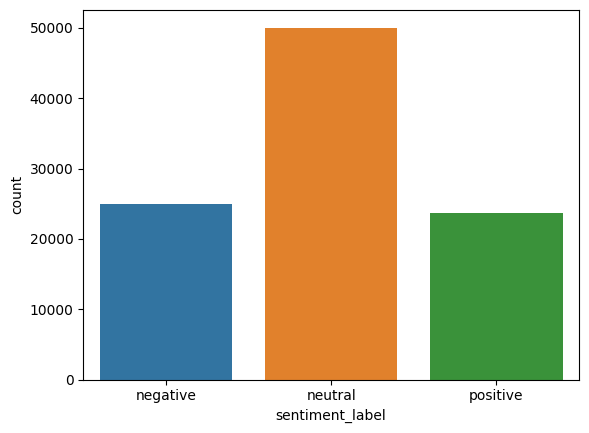

In [ ]:
sns.countplot(x="sentiment_label",data=df)

In [ ]:
sentiment = []

for i in df["sentiment_label"]:
    if i == "positive":
        sentiment.append(1)
    elif (i == "Irrelevant") or (i == "neutral"):
        sentiment.append(0)
    else:
        sentiment.append(-1)
df["sentiment"] = sentiment
df

ID                       Date    Username  \
0      1638329623946878976  2023-03-21 23:59:55+00:00  lqgds36373   
1      1638329621581275136  2023-03-21 23:59:55+00:00  yxwec12342   
2      1638329600471171074  2023-03-21 23:59:50+00:00  cwsea23772   
3      1638329587133194240  2023-03-21 23:59:46+00:00  jerje51666   
4      1638329567759802368  2023-03-21 23:59:42+00:00  wwxly15746   
...                    ...                        ...         ...   
98754  1636521833494351872  2023-03-17 00:16:24+00:00  mlxmo58921   
98755  1636521810144673793  2023-03-17 00:16:19+00:00  oshfg66182   
98756  1636521791744032771  2023-03-17 00:16:14+00:00  ecxto33891   
98757  1636521759968219144  2023-03-17 00:16:07+00:00  gukaa66248   
98758  1636521747540242432  2023-03-17 00:16:04+00:00  haffm49006   

                                                   Tweet  ReplyCount  \
0                      ChatGPT is another woke machine.            4   
1      of the Atlantic, or only near the Atla #推特账号 m...           0   
2       This thread is saved to your Notion database....           0   
3                             Prompt AI – ChatGPT #0018            1   
4      Just had some interesting conversations with G...           1   
...                                                  ...         ...   
98754   Sorry my phones on da blink n my dyslexic mes...           0   
98755   If someone were to tell a future version of C...           1   
98756  ChatGPT can talk to your AWS infrastructure fo...           0   
98757  ChatGPT is not yet a human, but some humans ha...           0   
98758   One hopes that it knows about non-binary logi...           0   

       RetweetCount  LikeCount  QuoteCount    OnlyDate  OnlyHour  OnlyMin  \
0                 4         32           0  2023-03-21        23       59   
1                 0          0           0  2023-03-21        23       59   
2                 0          0           0  2023-03-21        23       59   
3                 0          0           0  2023-03-21        23       59   
4                 0          0           0  2023-03-21        23       59   
...             ...        ...         ...         ...       ...      ...   
98754             0          1           0  2023-03-17         0       16   
98755             0          2           0  2023-03-17         0       16   
98756             0          0           0  2023-03-17         0       16   
98757             0          0           0  2023-03-17         0       16   
98758             0          0           0  2023-03-17         0       16   

                                         processed_tweet sentiment_label  \
0                       chatgpt is another woke machine.        negative   
1      of the atlantic, or only near the atla more to...         neutral   
2      this thread is saved to your notion database. ...         neutral   
3                                    prompt ai – chatgpt         neutral   
4      just had some interesting conversations with g...        positive   
...                                                  ...             ...   
98754  sorry my phones on da blink n my dyslexic mess...        negative   
98755  if someone were to tell a future version of ch...         neutral   
98756  chatgpt can talk to your aws infrastructure fo...         neutral   
98757  chatgpt is not yet a human, but some humans ha...         neutral   
98758  one hopes that it knows about nonbinary logic....         neutral   

       sentiment_score  sentiment  
0               0.8628         -1  
1               0.8373          0  
2               0.8854          0  
3               0.8958          0  
4               0.9558          1  
...                ...        ...  
98754           0.6278         -1  
98755           0.9114          0  
98756           0.8676          0  
98757           0.8428          0  
98758           0.4792          0  

[98759 rows x 15 columns]

In [ ]:
df.sentiment.value_counts()

 0    50049
-1    24968
 1    23742
Name: sentiment, dtype: int64

In [ ]:
plot=df.sentiment.value_counts()
px.bar(plot,color=plot.index,color_continuous_scale=px.colors.sequential.Cividis)

In [ ]:
s1=df[df["sentiment"] == 1].sample(23742, replace=True)
s2=df[df["sentiment"] == -1].sample(24968, replace=True)

df=pd.concat([s1,s2])
print(df.shape)
print(df.sentiment.value_counts(normalize=True))

(48710, 15)
-1    0.512585
 1    0.487415
Name: sentiment, dtype: float64


In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

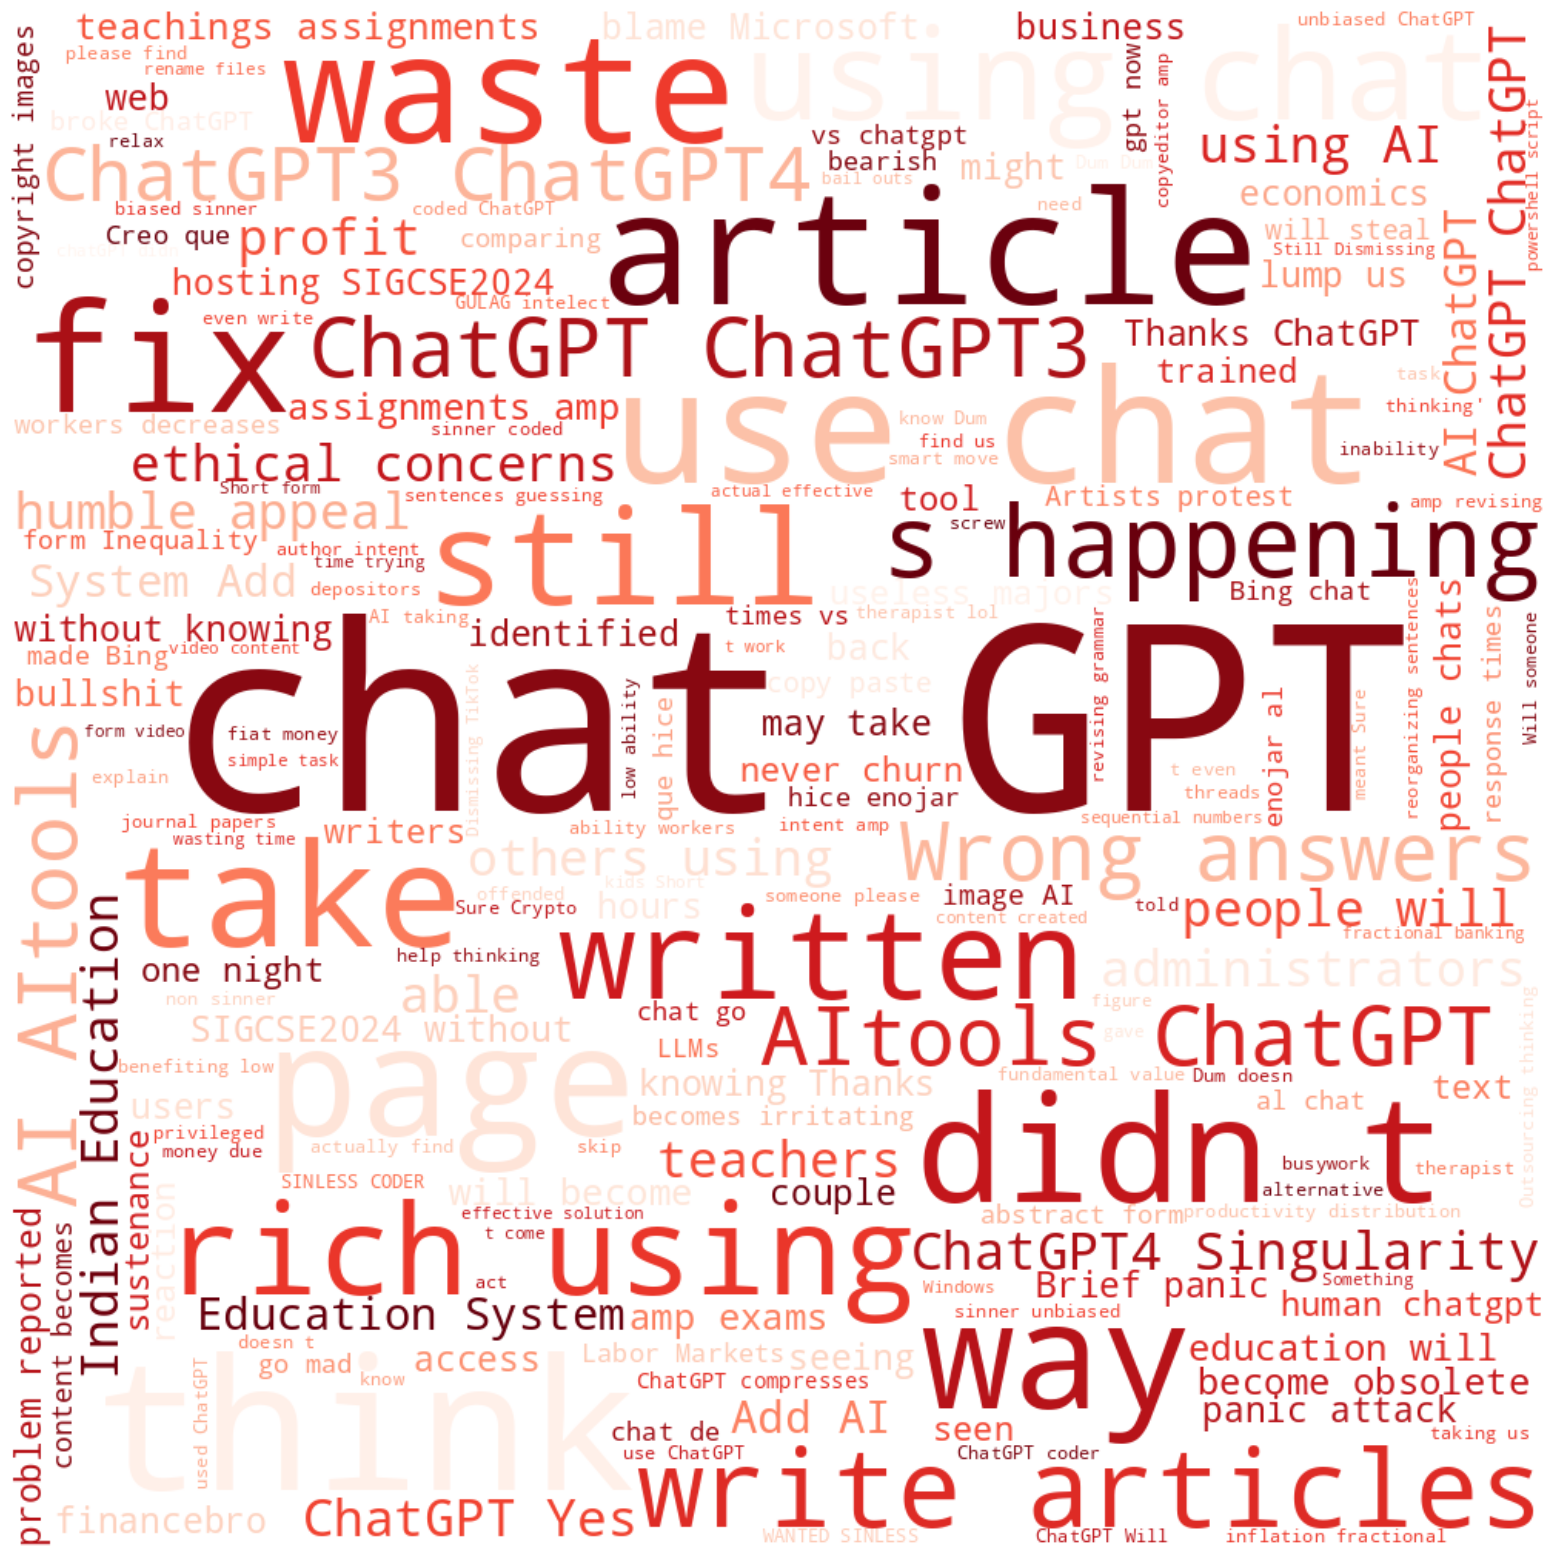

In [ ]:
#polarity = -1
trains1=df[df['sentiment_label']== "negative"]
all_text=' '.join([str(word) for word in trains1['Tweet']])
word_cloud=WordCloud(colormap='Reds', width=1000, height=1000,mode='RGBA',background_color='white').generate(all_text)
plt.figure(figsize=(20,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

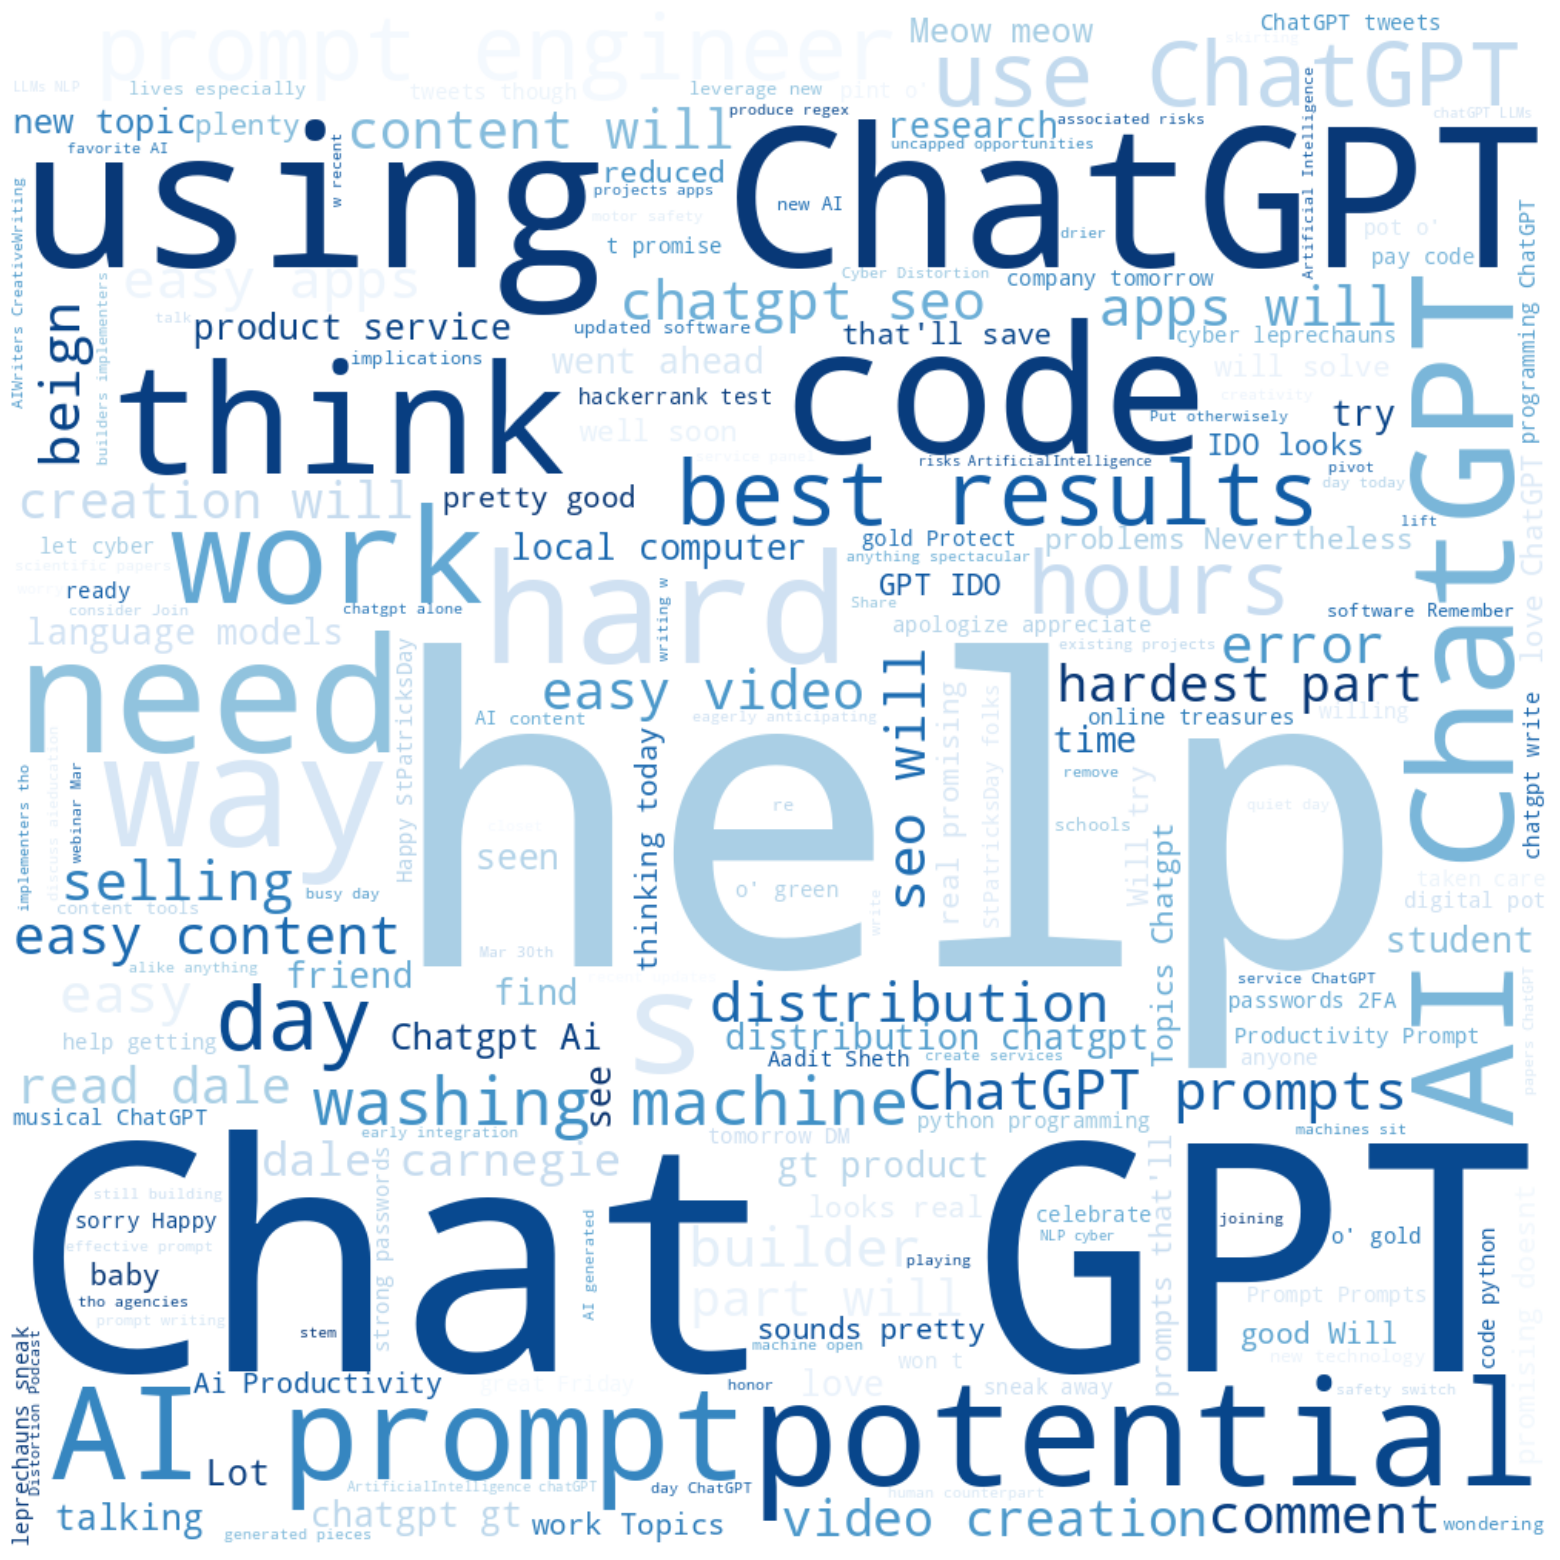

In [ ]:
#polarity = 1
trains1=df[df['sentiment_label']== "positive"]
all_text=' '.join([str(word) for word in trains1['Tweet']])
word_cloud=WordCloud(colormap='Blues', width=1000, height=1000,mode='RGBA',background_color='white').generate(all_text)
plt.figure(figsize=(20,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

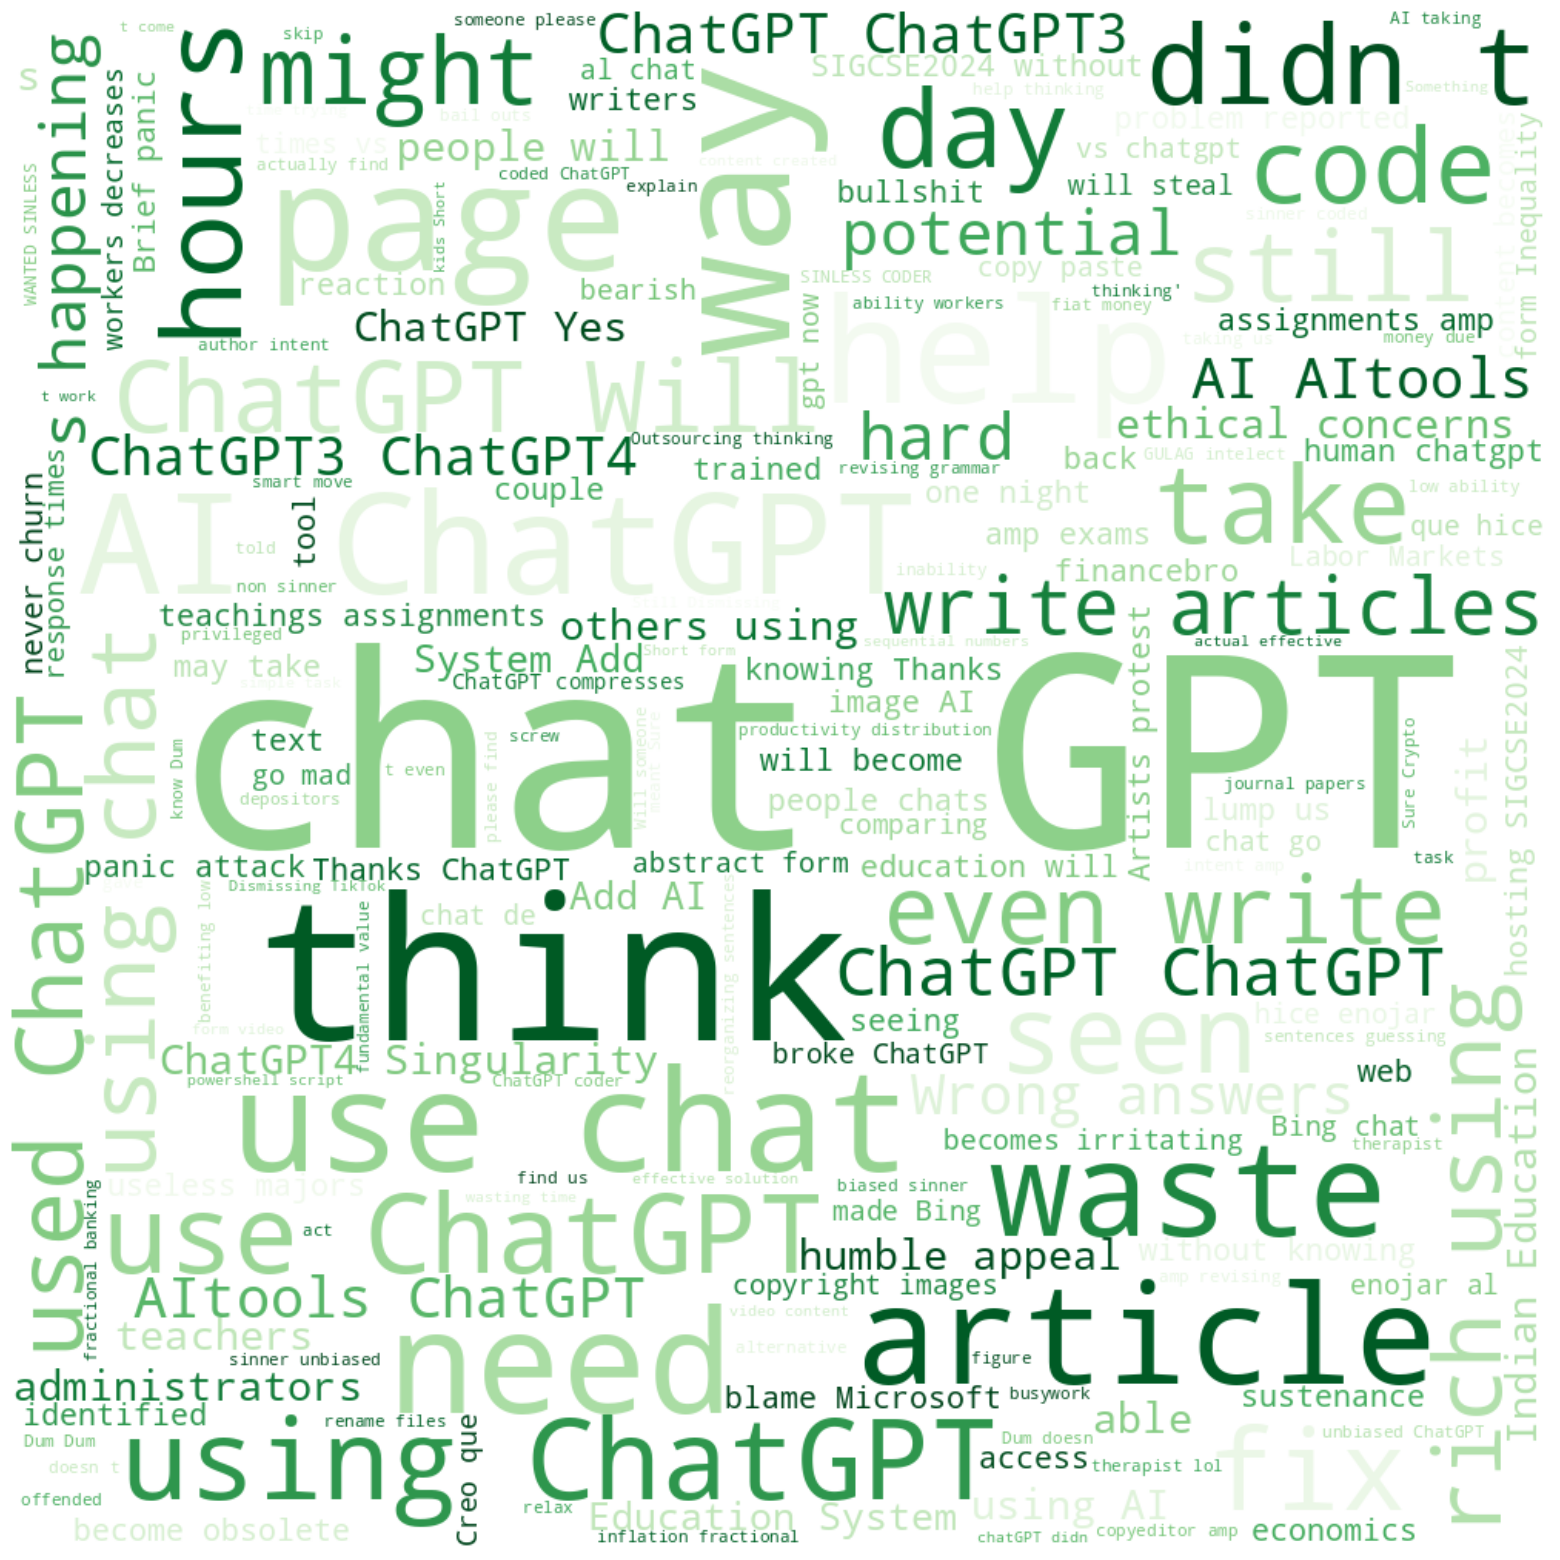

In [ ]:
#polarity = 0
trains1=df
all_text=' '.join([str(word) for word in trains1['Tweet']])
word_cloud=WordCloud(colormap='Greens', width=1000, height=1000,mode='RGBA',background_color='white').generate(all_text)
plt.figure(figsize=(20,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [ ]:
#preprocessing

import string, re

def cleansing(df):
    #lowertext
    df=df.lower()

    #Remove Punctuation
    remove=string.punctuation
    translator=str.maketrans(remove,' '*len(remove))
    df=df.translate(translator)

    #Remove ASCII & UNICODE
    df=df.encode('ascii','ignore').decode('utf-8')
    df=re.sub(r'[^\x00-\x7f]',r'', df)

    #Remove Newline
    df=df.replace('\n',' ')

    return df

In [ ]:
df

ID                       Date    Username  \
56797  1637373432525365250  2023-03-19 08:40:21+00:00  hknkb56489   
96934  1636557617702277122  2023-03-17 02:38:36+00:00  jkclk74739   
96578  1636564539717087237  2023-03-17 03:06:06+00:00  flgxe23341   
56789  1637373590822608897  2023-03-19 08:40:59+00:00  qtopk80652   
54062  1637444261745442819  2023-03-19 13:21:48+00:00  bxzji54971   
...                    ...                        ...         ...   
15137  1638161063853056001  2023-03-21 12:50:07+00:00  jmwoa91726   
11182  1638204751438311425  2023-03-21 15:43:43+00:00  lgrok36598   
63280  1637189595807850497  2023-03-18 20:29:51+00:00  udscb61583   
10159  1638214153574789123  2023-03-21 16:21:05+00:00  nstbt78289   
13143  1638185695289425923  2023-03-21 14:28:00+00:00  qjqxu85346   

                                                   Tweet  ReplyCount  \
56797       Chatgpt is the only expert you ever need lol           1   
96934  Everyone's talk to or about ChatGPT and the la...           0   
96578  gone are the days where beign a builder was ha...           0   
56789  #NigerianElections2023 #ChatGPT #chatgpt4 \n\n...           1   
54062   please open restaurant 👀\n\nThis has been by ...           1   
...                                                  ...         ...   
15137  ChatGPT can never make chat - bhel, sev puri a...           0   
11182  I gave chat GPT-4 a budget of 100$ and it spen...           0   
63280   Outsourcing thinking is a smart move if 'thin...           0   
10159                   because chatgpt would do better.           0   
13143    Do you know Dum Dum doesn’t even write his t...           3   

       RetweetCount  LikeCount  QuoteCount    OnlyDate  OnlyHour  OnlyMin  \
56797             0          1           0  2023-03-19         8       40   
96934             0          0           0  2023-03-17         2       38   
96578             0          1           1  2023-03-17         3        6   
56789             0          0           0  2023-03-19         8       40   
54062             0          1           0  2023-03-19        13       21   
...             ...        ...         ...         ...       ...      ...   
15137             0          0           0  2023-03-21        12       50   
11182             0          1           0  2023-03-21        15       43   
63280             0          5           0  2023-03-18        20       29   
10159             0          0           0  2023-03-21        16       21   
13143             0          0           0  2023-03-21        14       28   

                                         processed_tweet sentiment_label  \
56797       chatgpt is the only expert you ever need lol        positive   
96934  everyones talk to or about chatgpt and the law...        positive   
96578  gone are the days where beign a builder was ha...        positive   
56789  have you seen the lead lightning system? disco...        positive   
54062  please open restaurant this has been by far th...        positive   
...                                                  ...             ...   
15137  chatgpt can never make chat  bhel, sev puri an...        negative   
11182  i gave chat gpt4 a budget of 100$ and it spent...        negative   
63280  outsourcing thinking is a smart move if thinki...        negative   
10159                   because chatgpt would do better.        negative   
13143  do you know dum dum doesn’t even write his thr...        negative   

       sentiment_score  sentiment  
56797           0.5175          1  
96934           0.6172          1  
96578           0.5034          1  
56789           0.9579          1  
54062           0.8209          1  
...                ...        ...  
15137           0.7178         -1  
11182           0.7555         -1  
63280           0.4794         -1  
10159           0.5929         -1  
13143           0.8414         -1  

[48710 rows x 15 columns]

In [ ]:
review = []
for index, row  in df.iterrows():
    review.append(cleansing(str(row['Tweet'])))


In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.5 MB/s eta 0:00:00


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

review = []
for index, row in df.iterrows():
    review.append(stopword.remove(str(row['Tweet'])))

df['preprocess']=review
df.head()

ID                       Date    Username  \
56797  1637373432525365250  2023-03-19 08:40:21+00:00  hknkb56489   
96934  1636557617702277122  2023-03-17 02:38:36+00:00  jkclk74739   
96578  1636564539717087237  2023-03-17 03:06:06+00:00  flgxe23341   
56789  1637373590822608897  2023-03-19 08:40:59+00:00  qtopk80652   
54062  1637444261745442819  2023-03-19 13:21:48+00:00  bxzji54971   

                                                   Tweet  ReplyCount  \
56797       Chatgpt is the only expert you ever need lol           1   
96934  Everyone's talk to or about ChatGPT and the la...           0   
96578  gone are the days where beign a builder was ha...           0   
56789  #NigerianElections2023 #ChatGPT #chatgpt4 \n\n...           1   
54062   please open restaurant 👀\n\nThis has been by ...           1   

       RetweetCount  LikeCount  QuoteCount    OnlyDate  OnlyHour  OnlyMin  \
56797             0          1           0  2023-03-19         8       40   
96934             0          0           0  2023-03-17         2       38   
96578             0          1           1  2023-03-17         3        6   
56789             0          0           0  2023-03-19         8       40   
54062             0          1           0  2023-03-19        13       21   

                                         processed_tweet sentiment_label  \
56797       chatgpt is the only expert you ever need lol        positive   
96934  everyones talk to or about chatgpt and the law...        positive   
96578  gone are the days where beign a builder was ha...        positive   
56789  have you seen the lead lightning system? disco...        positive   
54062  please open restaurant this has been by far th...        positive   

       sentiment_score  sentiment  \
56797           0.5175          1   
96934           0.6172          1   
96578           0.5034          1   
56789           0.9579          1   
54062           0.8209          1   

                                              preprocess  
56797       Chatgpt is the only expert you ever need lol  
96934  Everyone's talk to or about ChatGPT and the la...  
96578  gone are the days where beign a builder was ha...  
56789  #NigerianElections2023 #ChatGPT #chatgpt4 \n\n...  
54062   please open restaurant 👀\n\nThis has been by ...

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['processed_tweet'], df['sentiment'], train_size = 0.9)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
# implementasi pada dokumen kita
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(43839, 1011)
(4871, 1011)


In [ ]:
from sklearn.model_selection import cross_val_score
# import library evaluation
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score


f1 score hasil prediksi adalah: 
1.0
accuracy score hasil prediksi adalah: 
1.0
precision score hasil prediksi adalah: 
1.0
recall score hasil prediksi adalah: 
1.0


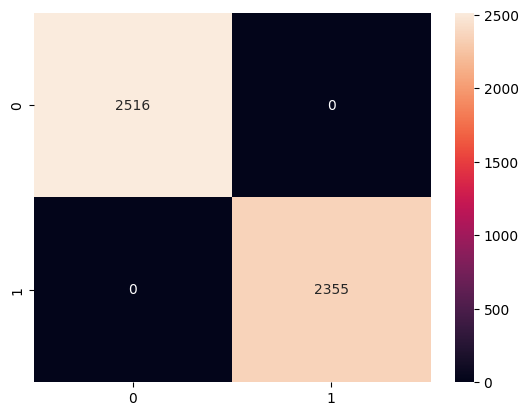

In [ ]:
from sklearn import naive_bayes

clf = naive_bayes.GaussianNB()

#Fitting
clf.fit(X_train.toarray(), y_train)
predict = clf.predict(X_test.toarray())

# f1_score
print("f1 score hasil prediksi adalah: ")
print(f1_score(y_test, predict))

# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(accuracy_score(y_test, predict))

# precision score
print("precision score hasil prediksi adalah: ")
print(precision_score(y_test, predict))

# recall score
print("recall score hasil prediksi adalah: ")
print(recall_score(y_test, predict))

import seaborn as sns
_=sns.heatmap(confusion_matrix(y_test, predict), annot=True,fmt='g')